https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [144]:
import torch
import torch.nn.functional as F
import random

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [145]:
words = open('names.txt', 'r').read().splitlines()
random.shuffle(words)

In [146]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [147]:
### HYPERPARAMETERS
NUM_STEPS = 9000
BLOCK_SIZE = 3
BATCH_SIZE = 32
HIDDEN_SIZE = 200

In [148]:
def buildDataSet(words):
    X,Y = [],[]
    for w in words:
        context = [0] * BLOCK_SIZE
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)

    return X,Y


n1 = int(.8*len(words))
n2 = int(.9*len(words))

X_t, Y_t = buildDataSet(words[:n1]) # train
X_d, Y_d = buildDataSet(words[n1:n2]) # dev
X_e, Y_e = buildDataSet(words[n2:]) # eval/test

In [149]:
### DEFINE MODEL
C = torch.randn((27,2))
W1 = torch.randn((C.shape[1] * BLOCK_SIZE, HIDDEN_SIZE))
b1 = torch.rand(HIDDEN_SIZE)
W2 = torch.randn((HIDDEN_SIZE,27)) * 0.01
b2 = torch.randn(27) * 0.01

params = [C, W1, b1, W2, b2]

for p in params:
    p.requires_grad = True


In [150]:
def forward_prop(ix):
    emb = C[X_t[ix]] # first embed the input indices
    h1 = torch.tanh(emb.view(-1, C.shape[1] * BLOCK_SIZE) @ W1 + b1)
    return h1 @ W2 + b2

In [151]:
losses = []
lr = 0.1


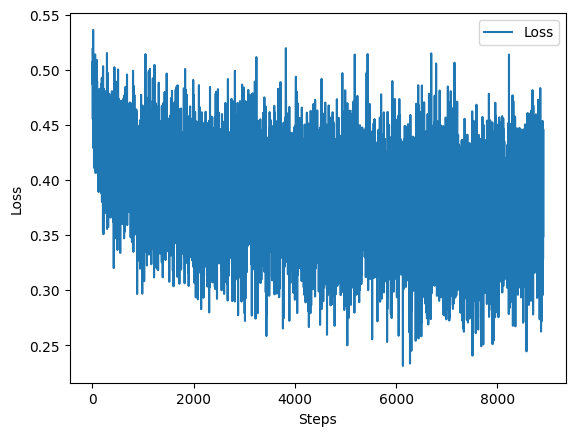

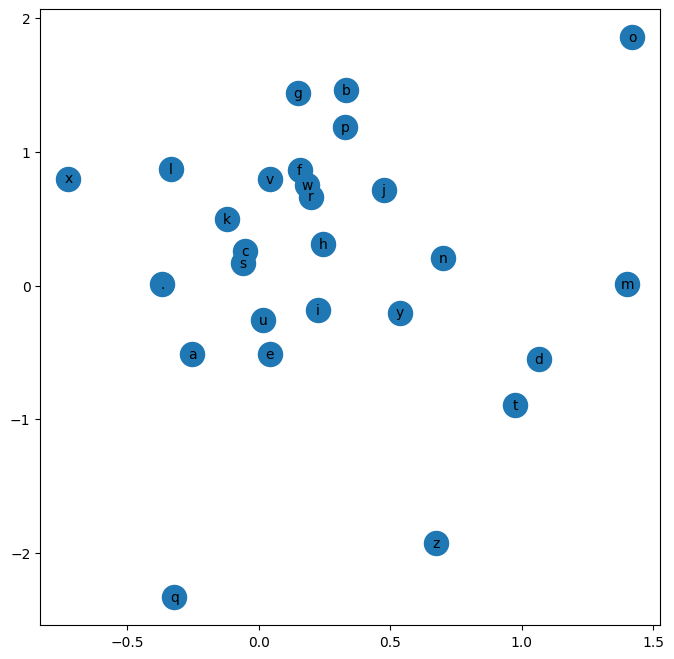

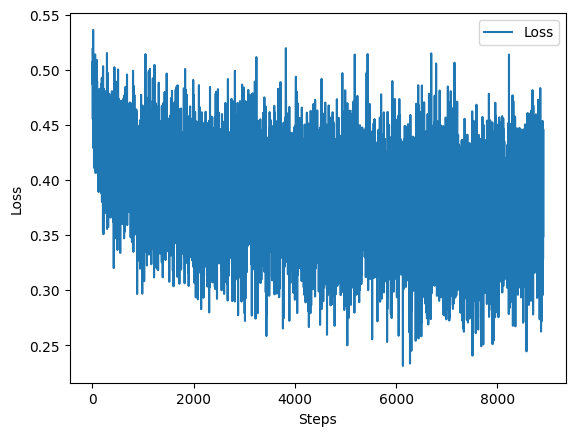

In [152]:

plt.ion()
fig, ax = plt.subplots()
line, = ax.plot([], [], label='Loss')  # Initialize an empty line
ax.set_xlabel('Steps')
ax.set_ylabel('Loss')
ax.legend()


for _ in range(NUM_STEPS):
    #Sample batch
    ix = torch.randint(0, X_t.shape[0], (BATCH_SIZE,))
    loss = F.cross_entropy(forward_prop(ix), Y_t[ix])

    losses.append(loss.log10().item());

    #backprop
    for p in params:
        p.grad = None

    loss.backward()

    for p in params:
        p.data += -lr * p.grad

    if(_ % (NUM_STEPS*.01) == 0):
        line.set_ydata(losses)
        line.set_xdata(range(len(losses)))
        ax.relim()

        ax.autoscale_view()
         # Update the figure in place
        fig.canvas.draw()
        fig.canvas.flush_events()  # Forces an immediate update without clearing output

        clear_output(wait=True)
        display(fig)


plt.ioff()
plt.show()

In [153]:
emb = C[X_d]
h1 = torch.tanh(emb.view(-1, C.shape[1] * BLOCK_SIZE,) @ W1 + b1)
logits = h1 @ W2 + b2
loss = F.cross_entropy(logits, Y_d)

loss.item()

2.3710522651672363

In [154]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=300)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="black")



In [155]:
### SAMPLING THE MODEL
for _ in range(20):
    out = []
    context = [0] * BLOCK_SIZE
    while True:
        emb = C[torch.tensor([context])]
        h1 = torch.tanh(emb.view(-1,C.shape[1] * BLOCK_SIZE ) @ W1 + b1)
        logits = h1 @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if(ix == 0):
            break
            
    print(''.join(itos[i] for i in out))

carhynshi.
bmalilro.
zcon.
basmalba.
lor.
.
mayya.
mey.
abuci.
dylyn.
ovbosharcon.
barca.
zose.
yuhamistyish.
fylija.
kylila.
alon.
umiton.
alande.
avy.
